In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
concrete =pd.read_csv("concrete.csv")

In [3]:
concrete

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [4]:
X=concrete[["cement","slag","ash","water","superplastic","coarseagg","fineagg","age"]]
Y=concrete.strength

X=sm.add_constant(X)

model=sm.OLS(Y,X).fit()
predictions=model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     204.3
Date:                Tue, 30 Apr 2019   Prob (F-statistic):          6.29e-206
Time:                        11:51:38   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.3312     26.586     -0.878      0.380     -75.500      28.837
cement           0.1198      0.008     14.113      0.000       0.103       0.136
slag             0.1039      0.010     10.247      0.000       0.084       0.124
ash              0.0879      0.013      6.988      0.000       0.063       0.113
water           -0.1499      0.040     -3.731      0.000      -0.229      -0.071
superplastic     0.2922      0.093      3.128      0.002       0.109       0.476
coarseagg        0.0181      0.009      1.926      0.054      -0.000       0.037
fineagg          0.0202      0.011      1.887      0.059      -0.001       0.041
age              0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.378   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.304
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
concrete.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


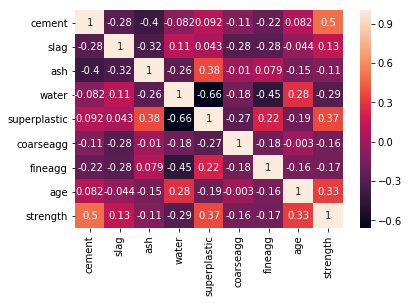

In [6]:
sns.heatmap(concrete.corr(),annot=True)
plt.show()

In [7]:
influence = model.get_influence()
resid_student = influence.resid_studentized_external

In [8]:
resid = pd.concat([concrete,pd.Series(resid_student,name="Studentized Residuals")],axis = 1)
resid.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,Studentized Residuals
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89,0.857736
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51,-0.515967
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22,0.267831
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85,2.523838
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29,-0.567012


In [9]:
ind=resid.loc[np.absolute(resid["Studentized Residuals"])>3,:].index
print(ind)

Int64Index([192, 506], dtype='int64')


In [16]:
X1=concrete[[]]
Y1=concrete.strength

X1=sm.add_constant(X)

model=sm.OLS(Y1,X1).fit()
predictions=model.predict(X1)
model.summary()

C:\Users\RAJAT\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1554: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
C:\Users\RAJAT\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\RAJAT\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\RAJAT\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 30 Apr 2019   Prob (F-statistic):                nan
Time:                        12:10:06   Log-Likelihood:                -4361.2
No. Observations:                1030   AIC:                             8724.
Df Residuals:                    1029   BIC:                             8729.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.8180      0.521     68.810      0.000      34.797      36.839
==============================================================================
Omnibus:                       33.648   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.101
Skew:                           0.416   Prob(JB):                     3.94e-08
Kurtosis:                       2.682   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
[variance_inflation_factor(X1.values,j) for j in range(1,X1.shape[1])]

[]